# Voronoi orbit binning
This testing notebook expects an existing all_models table and will act on its best-fit model.

In [1]:
import dynamite as dyn

import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from vorbin.voronoi_2d_binning import voronoi_2d_binning

print('DYNAMITE version', dyn.__version__)
print('    installed at ', dyn.__path__)  # Uncomment to print the complete DYNAMITE installation path

fname = 'NGC6278_config.yaml'
c = dyn.config_reader.Configuration(fname, reset_logging=True)

[INFO] 18:09:32 - dynamite.config_reader.Configuration - Config file NGC6278_config.yaml read.
[INFO] 18:09:32 - dynamite.config_reader.Configuration - io_settings...
[INFO] 18:09:32 - dynamite.config_reader.Configuration - Output directory tree: NGC6278_output/.
[INFO] 18:09:32 - dynamite.config_reader.Configuration - system_attributes...
[INFO] 18:09:32 - dynamite.config_reader.Configuration - model_components...
[INFO] 18:09:33 - dynamite.config_reader.Configuration - system_parameters...
[INFO] 18:09:33 - dynamite.config_reader.Configuration - orblib_settings...
[INFO] 18:09:33 - dynamite.config_reader.Configuration - weight_solver_settings...
[INFO] 18:09:33 - dynamite.config_reader.Configuration - Will attempt to recover partially run models.
[INFO] 18:09:33 - dynamite.config_reader.Configuration - parameter_space_settings...
[INFO] 18:09:33 - dynamite.config_reader.Configuration - multiprocessing_settings...
[INFO] 18:09:33 - dynamite.config_reader.Configuration - ... using 4 CP

DYNAMITE version 4.2.0
    installed at  ['/Users/maindl/.local/lib/python3.10/site-packages/dynamite']


In [2]:
# instantiate a Coloring object
coloring = dyn.coloring.Coloring(c)

In [3]:
# define the number of r and lambda_z bins
nr = 6
nl = 7

In [4]:
plotter = dyn.plotter.Plotter(c)

[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification:
[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% box
[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% x-tubes
[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% y-tubes
[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary -     - 100.0% z-tubes
[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% other types
[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary - Amongst tubes, % with only one nonzero component of L:
[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of x-tubes
[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of y-tubes
[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary -     - 42.8% of z-tubes
[INFO] 18:09:33 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification DONE.
[INFO] 18:09:33 - dynamite.weight_solvers.NNLS - Using WeightSolver: NNLS/scipy
[INFO] 18:09:36 - dynamite.weig

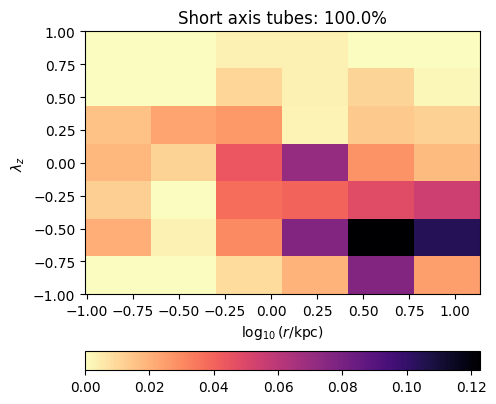

In [5]:
# get an overview of the orbit distribution
# NOTE: when using force_lambda_z=True, then the titles of the orbit-distribution plots are incorrect.
# All orbits are shown in this distribution - not only short-axis tubes!
fig = plotter.orbit_distribution(model=None, minr=None, maxr=None, nr=nr, nl=nl,
                                 orientation='vertical', subset='short', force_lambda_z=True)

[INFO] 18:09:38 - dynamite.weight_solvers.NNLS - Using WeightSolver: NNLS/scipy
[INFO] 18:09:41 - dynamite.weight_solvers.NNLS - NNLS solution read from existing output
[INFO] 18:09:41 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification:
[INFO] 18:09:41 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% box
[INFO] 18:09:41 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% x-tubes
[INFO] 18:09:41 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% y-tubes
[INFO] 18:09:41 - dynamite.orblib.LegacyOrbitLibrary -     - 100.0% z-tubes
[INFO] 18:09:41 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% other types
[INFO] 18:09:41 - dynamite.orblib.LegacyOrbitLibrary - Amongst tubes, % with only one nonzero component of L:
[INFO] 18:09:41 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of x-tubes
[INFO] 18:09:41 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of y-tubes
[INFO] 18:09:41 - dynamite.orblib.LegacyOrbitLibrary -     - 42.8% of z-tubes
[INFO] 18:09:41 - dynamite.orbli

Bin-accretion...
1  /  11
2  /  11
3  /  11
4  /  11
5  /  11
6  /  11
7  /  11
8  /  11
9  /  11
10  /  11
11  /  11
12  /  11
13  /  11
14  /  11
15  /  11
16  /  11
17  /  11
18  /  11
19  /  11
20  /  11
21  /  11
22  /  11
23  /  11
23  initial bins.
Reassign bad bins...
10  good bins.
Modified Lloyd algorithm...
Iter:    1  Diff: 1.25
Iter:    2  Diff: 0.7146
Iter:    3  Diff: 0.4412
Iter:    4  Diff: 0
3  iterations.
Unbinned pixels:  2  /  42
Fractional S/N scatter (%): 50.050986955014906
Elapsed time accretion: 0.01 seconds
Elapsed time optimization: 0.00 seconds


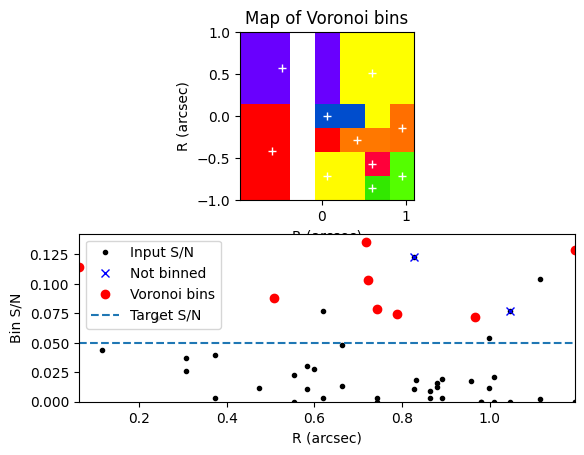

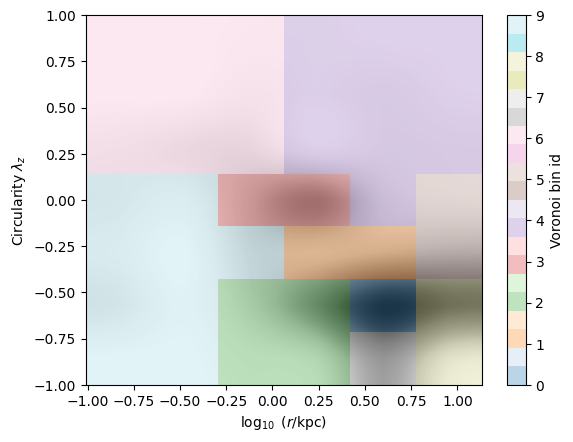

In [6]:
# do the Voronoi binning
vor_weight = 0.05  # define the desired (minimum) total orbital weight in each Voronoi bin
vor_bundle_mapping, phase_space_binning = coloring.bin_phase_space(model=None, minr=None, maxr=None,
                                                                   nr=nr, nl=nl, vor_weight=vor_weight,
                                                                   vor_ignore_zeros=False,
                                                                   make_diagnostic_plots=True, extra_diagnostic_output=True)

In [7]:
# for each input bin: r coordinate, lambda_z coordinate, total weight
print(f'{phase_space_binning["in"].shape=}')
phase_space_binning['in']

phase_space_binning["in"].shape=(3, 42)


array([[-0.83141587, -0.47373216, -0.11604844,  0.24163528,  0.59931899,
         0.95700271, -0.83141587, -0.47373216, -0.11604844,  0.24163528,
         0.59931899,  0.95700271, -0.83141587, -0.47373216, -0.11604844,
         0.24163528,  0.59931899,  0.95700271, -0.83141587, -0.47373216,
        -0.11604844,  0.24163528,  0.59931899,  0.95700271, -0.83141587,
        -0.47373216, -0.11604844,  0.24163528,  0.59931899,  0.95700271,
        -0.83141587, -0.47373216, -0.11604844,  0.24163528,  0.59931899,
         0.95700271, -0.83141587, -0.47373216, -0.11604844,  0.24163528,
         0.59931899,  0.95700271],
       [-0.85714286, -0.85714286, -0.85714286, -0.85714286, -0.85714286,
        -0.85714286, -0.57142857, -0.57142857, -0.57142857, -0.57142857,
        -0.57142857, -0.57142857, -0.28571429, -0.28571429, -0.28571429,
        -0.28571429, -0.28571429, -0.28571429,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.28571429,
         0.28571

In [8]:
# for each Voronoi bin: weighted centroid coordinates r_bar, lambda_bar and total weight
print(f'{phase_space_binning["out"].shape=}')
phase_space_binning['out']

phase_space_binning["out"].shape=(3, 10)


array([[ 0.59931899,  0.42047713,  0.06279342,  0.06279342,  0.59931899,
         0.95700271, -0.47373216,  0.59931899,  0.95700271, -0.59296006],
       [-0.57142857, -0.28571429, -0.71428571,  0.        ,  0.51428571,
        -0.14285714,  0.57142857, -0.85714286, -0.71428571, -0.41269841],
       [ 0.12275883,  0.08803079,  0.13579599,  0.1147496 ,  0.0746969 ,
         0.07183893,  0.0782937 ,  0.07671365,  0.12883743,  0.10293491]])

In [9]:
# phase space mapping: Voronoi bin numbers for each input bin
print(f'{phase_space_binning["map"].shape=}')
phase_space_binning['map']

phase_space_binning["map"].shape=(42,)


array([9, 9, 2, 2, 7, 8, 9, 9, 2, 2, 0, 8, 9, 9, 9, 1, 1, 5, 9, 9, 3, 3,
       4, 5, 6, 6, 6, 4, 4, 4, 6, 6, 6, 4, 4, 4, 6, 6, 6, 4, 4, 4])

In [10]:
# orbit bundle mapping: weighted contribution of each "original" orbit bundle to the Voronoi orbit bundles
print(f'{vor_bundle_mapping.shape=}')

vor_bundle_mapping.shape=(10, 360)


## Testing the orbit binning
As dithering=1, each "original" orbit bundle is just one orbit. Hence, 100% of each such orbit bundle will lie in a unique $r, \lambda_z$ input bin and the `vor_bundle_mapping` will map these "original" orbit bundles to the Voronoi orbit bundles.

To test the orbit binning, we will - for each Voronoi bin (corresponding to one Voronoi orbit bundle each) - identify the connected "original" orbit bundles and add up their weighted fractions. These should be the same whether computed (a) from the binning input data, (b) from the total weights in the Voronoi bins, and (c) from adding all "original" orbit bundles' contributions in the `vor_bundle_mapping`.

In [11]:
for vor_bin in range(phase_space_binning['out'].shape[-1]):
    input_bins = np.where(phase_space_binning['map']==vor_bin)[0]
    print(f'\ninput bins mapped to {vor_bin=}: {input_bins}')
    # orbit weights in input bins:
    weight_in = [phase_space_binning['in'][2][i] for i in input_bins]
    weight_in_total = sum(weight_in)
    print(f'{weight_in=}, {weight_in_total=}')
    vorbin_weight = phase_space_binning['out'][2][vor_bin]
    print(f'{vorbin_weight=}')
    vor_bundle_weight = np.sum(vor_bundle_mapping[vor_bin])
    print(f'{vor_bundle_weight=}')
    print(np.isclose(weight_in_total, vorbin_weight) and np.isclose(weight_in_total, vor_bundle_weight))


input bins mapped to vor_bin=0: [10]
weight_in=[0.12275882652399149], weight_in_total=0.12275882652399149
vorbin_weight=0.12275882652399149
vor_bundle_weight=0.12275882652399149
True

input bins mapped to vor_bin=1: [15 16]
weight_in=[0.03987211906018575, 0.04815866926494969], weight_in_total=0.08803078832513545
vorbin_weight=0.08803078832513545
vor_bundle_weight=0.08803078832513545
True

input bins mapped to vor_bin=2: [2 3 8 9]
weight_in=[0.008868649732325096, 0.01959223264655335, 0.030171916065722438, 0.07716319177794059], weight_in_total=0.13579599022254146
vorbin_weight=0.13579599022254146
vor_bundle_weight=0.1357959902225415
True

input bins mapped to vor_bin=3: [20 21]
weight_in=[0.04405146437482707, 0.07069813986087693], weight_in_total=0.114749604235704
vorbin_weight=0.114749604235704
vor_bundle_weight=0.11474960423570399
True

input bins mapped to vor_bin=4: [22 27 28 29 33 34 35 39 40 41]
weight_in=[0.027475433042330764, 0.0027515858766259584, 0.013488842233013547, 0.011836

## Backup

In [12]:
# for tests: get the model, the orblib, and the weights
best_model_idx = c.all_models.get_best_n_models_idx(1)[0]
model = c.all_models.get_model_from_row(best_model_idx)
orblib = model.get_orblib()
_ = model.get_weights(orblib)
weights = model.weights
print(f'Picking best model, {best_model_idx=}.')
if not hasattr(orblib, 'orb_properties'):
    orblib.read_orbit_property_file()
orb_properties = orblib.orb_properties

[INFO] 18:09:44 - dynamite.weight_solvers.NNLS - Using WeightSolver: NNLS/scipy
[INFO] 18:09:47 - dynamite.weight_solvers.NNLS - NNLS solution read from existing output


Picking best model, best_model_idx=12.


In [13]:
# assign minr, maxr
minr = np.min(orb_properties['r']).value
maxr = np.max(orb_properties['r']).value
print(f'{minr=}, {maxr=}')
# get projection tensor
orblib.get_projection_tensor(minr=minr, maxr=maxr, nr=nr, nl=nl, force_lambda_z=True)
orbit_fractions = orblib.projection_tensor[2]  # fraction of each "original" orbit bundle in each (r, l) bin

[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification:
[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% box
[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% x-tubes
[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% y-tubes
[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary -     - 100.0% z-tubes
[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% other types
[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary - Amongst tubes, % with only one nonzero component of L:
[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of x-tubes
[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of y-tubes
[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary -     - 42.8% of z-tubes
[INFO] 18:09:47 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification DONE.


minr=0.09766574505634011, maxr=13.672394113065254
